<a href="https://colab.research.google.com/github/issarbhavya/ML/blob/main/01_neural_network_regression_using_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Typical architecture of a regresison neural network



Hyperparamete:	Typical value

Input layer shape	: same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

Hidden layer(s)	Problem : specific, minimum = 1, maximum = unlimited

Neurons per hidden layer :	Problem specific, generally 10 to 

Output layer shape : 	Same shape as desired prediction shape (e.g. 1 for house price)

Hidden activation :	Usually ReLU (rectified linear unit)
Output activation	: one, ReLU, logistic/

Loss function : MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if 

Optimizer	: SGD (stochastic gradient descent), Adam

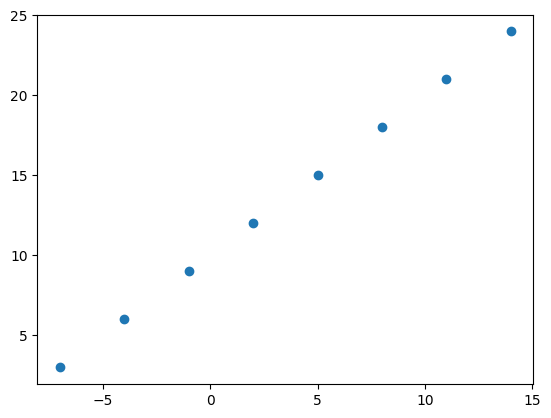

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) ## X is Independent variable

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) ## y is dependent variable


## Independent variable is usually written in caps, whereas dependent is written in lower case

# Visualize it
plt.scatter(X, y)

In [3]:
## how about for finding pattern, we manipulate x to get y 

print(X + 10) 

print(y)

## as you can see both are same

[ 3.  6.  9. 12. 15. 18. 21. 24.]
[ 3.  6.  9. 12. 15. 18. 21. 24.]


so, basically this is the relationship we want our neural network to learn.

this is the realationship between ur Independent and dependent variable

---



## Regression input shapes and output shapes


One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

In [4]:
## Creating a demo for our housing price prediction problem

import tensorflow as tf

# basically here input and output shapes of a regresson model are converted to tensors
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)



---


Our goal here will be to use X to predict y.

So our input will be X and our output will be y.




In [5]:
### lets check the input nd output shape 

# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape

((), ())

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

examples like these don't really make sense but what we basically need to do is, get one x vale nd return one y value

In [6]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [7]:
X.shape,   y.shape

((8,), (8,))

In [8]:
X[0].shape,   y[0].shape

((), ())

confusion with the output since we have no dimension, that is, it is a scalar value

In [9]:
## converting our numpy array to tensorflow
X=tf.constant(X)
y=tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
X[0].shape,   y[0].shape

(TensorShape([]), TensorShape([]))

same confusion ,



In our case, we're trying to build a model to predict the pattern between X[0] equalling -7.0 and y[0] equalling 3.0.

So now we get our answer, we're trying to use 1 X value to predict 1 y value.

---




So, now our question is how we will build a model to figure out the realtionship here




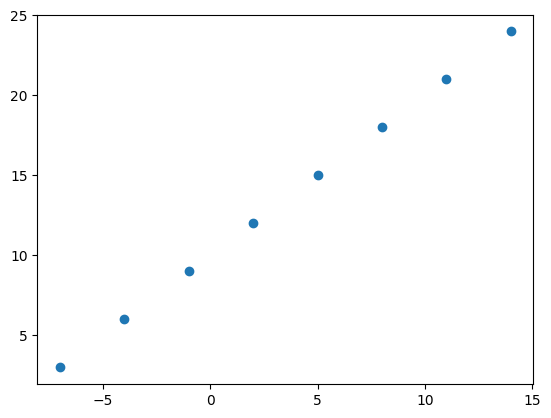

In [11]:
plt.scatter(X, y)

### Steps in modeling a Tensor Flow



---


**1 Creating a model-** 

a. define the **input and output layers**

b. define **hidden layer** for deep learning

---
**2 compiling a model-**

a. define **loss function**(tells us how wrong our model is)

b. define **optimizer** (tells our model to improve patterns it is learning)

c. **Evaluation metrics**(to find out ways to understand model decision making policies better)

---
**3 fitting a model-**

Letting model to try nd find patterns between X nd y(features and labels)

---






In [12]:
tf.random.set_seed(42)




## 1. Creating model using Sequential API
"""
in tensorflow nd keras there are basically two types of apis, Sequential nd functional

"""

model = tf.keras.Sequential([
# this basically tells tensorflow that i want to create a model nd want it to go sequentially through it 
  
   
   tf.keras.layers.Dense(1)   
   # the following is our input layer, we have used "1",
   # as we want our model to take input of one number 
])


## 2. compile the model

model.compile(loss=tf.keras.losses.mae,  # mae : mean absolute error
             # the above line computes mean absolute error between labels and prediction

             # so this basically tells us that on an avg
             # how wrong the predictions(y_pred) are compared to true values(y_true)
             
             optimizer= tf.keras.optimizers.SGD(), # sgd : stochasitc gradient descent
             # it tells neural network how to improve
              
             metrics=["mae"]
             ) 


## 3. fit the model

# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+


model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
# epochs=5 means 5 laps/oppertunities to go through all of the
# X nd y values nd find out the patters/relatoinships

Epoch 1/5
1/1 [==============================] - 1s 592ms/step - loss: 14.6820 - mae: 14.6820
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 14.5495 - mae: 14.5495
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 14.4170 - mae: 14.4170
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 14.2845 - mae: 14.2845
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 14.1520 - mae: 14.1520




---


Thus we have trained our model

now let's chaek it with X nd y



In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[-2.7162895]], dtype=float32)

the answer must be 27, but still it is close to it, as we can see that after training of 5 laps, loss is still 8.34 

In [14]:
model.predict([22.0])

1/1 [==============================] - 0s 45ms/step


array([[-3.5299041]], dtype=float32)

In [15]:
model.predict([39.0])

1/1 [==============================] - 0s 42ms/step


array([[-6.2961936]], dtype=float32)

Thus as we can see, that for different different predictions, the answers are still not matching nd sometimes difference in expected result is more nd sometimes its less

## Improving our model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2. Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).



---
we can convert the smaller model to bigger nd improved model step by step, so follwing ways are (check the differences)


In [16]:
#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100) ## laps has been changed to 100

Epoch 1/100
1/1 [==============================] - 0s 409ms/step - loss: 13.8537 - mae: 13.8537
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.7212 - mae: 13.7212
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5887 - mae: 13.5887
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4562 - mae: 13.4562
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3237 - mae: 13.3237
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1912 - mae: 13.1912
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0587 - mae: 13.0587
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9262 - mae: 12.9262
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7937 - mae: 12.7937
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6612 - mae: 12.6612
Epoch 11/100
1/1 [==============================]

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 129ms/step


array([[29.504414]], dtype=float32)

In [18]:
model.predict([22.0])

1/1 [==============================] - 0s 153ms/step


array([[37.92409]], dtype=float32)



---



---



In [19]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [20]:
X=tf.expand_dims(X,axis=-1)
X

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [21]:
## again improving the model

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),

    
    # adding more hidden layers, with 100 neurons 
    # it might show that the loss has reduced, but effictively won't improve the outcome


    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 628ms/step - loss: 13.5062 - mae: 13.5062
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.9305 - mae: 12.9305
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3562 - mae: 12.3562
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7714 - mae: 11.7714
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1967 - mae: 11.1967
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5987 - mae: 10.5987
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.9883 - mae: 9.9883
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3702 - mae: 9.3702
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0126 - mae: 8.0126
Epoch 11/100
1/1 [==============================] - 0s 1

In [22]:
X,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
model.predict([17.0])

1/1 [==============================] - 0s 185ms/step


array([[31.262434]], dtype=float32)

In [24]:
## again improving the model

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    # we have reduced the number of neurons, changed activation to None
    
    
    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 473ms/step - loss: 12.9571 - mae: 12.9571
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4130 - mae: 12.4130
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8646 - mae: 11.8646
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3091 - mae: 11.3091
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7436 - mae: 10.7436
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1652 - mae: 10.1652
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5709 - mae: 9.5709
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9576 - mae: 8.9576
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3223 - mae: 8.3223
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.6615 - mae: 7.6615
Epoch 11/100
1/1 [==============================] - 0s 8ms/ste

In [25]:
model.predict([17.0])

1/1 [==============================] - 0s 73ms/step


array([[32.030952]], dtype=float32)

very near, but still for 22 its not that precise

In [26]:
model.predict([22.0])

1/1 [==============================] - 0s 39ms/step


array([[40.476963]], dtype=float32)



---



---
We need to try different different methods in training our model to get an more nd more precise results


In [27]:
# learning_rate is the most important change we can make to our neural network


## again improving the model

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    # we have reduced the number of neurons, changed activation to None
    
    
    tf.keras.layers.Dense(1)
])

#compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              ## changing optimisation function and changing lr to 0.01,which by default is 0.001
              
              metrics=["mae"]
              )

# fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 571ms/step - loss: 14.2504 - mae: 14.2504
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5646 - mae: 13.5646
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8759 - mae: 12.8759
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1839 - mae: 12.1839
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4882 - mae: 11.4882
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7874 - mae: 10.7874
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0797 - mae: 10.0797
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3623 - mae: 9.3623
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6324 - mae: 8.6324
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8872 - mae: 7.8872
Epoch 11/100
1/1 [==============================] - 0s 9



---


Lowest loss till now 



---




In [28]:
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[27.321722]], dtype=float32)

In [29]:
model.predict([22.0])

1/1 [==============================] - 0s 50ms/step


array([[32.460133]], dtype=float32)



---


Best output till now

---



### Evaluating a model

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

.
.
.


> *Visualize, visualize, visualize*



The data - what data are you working with? What does it look like?

The model itself - what does the architecture look like? What are the different shapes?

The training of a model - how does a model perform while it learns?

The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?






In [30]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [32]:
# making label
y=X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])



---



**Split data into training/test set**

*Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester)*.

.


*Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).*

.


*Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester). *

In [33]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

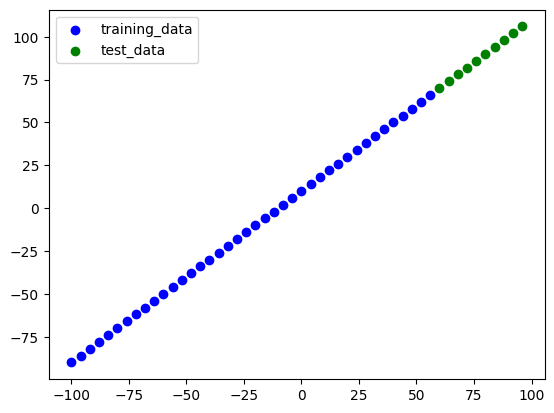

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train, c="b" ,label="training_data")
plt.scatter(X_test,y_test, c="g", label="test_data")

plt.legend()

In [38]:
### creating neural network which builds automaticallyby defining input_shape argument

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # we wrote "1" since we'r passing 1 no. to predict 1 no.
])

#compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit
# model.fit(X_train,y_train,epochs=100)              

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

.



> Total params - total number of parameters in the model.(X nd y)





> Trainable parameters - these are the parameters (patterns) the model can update as it trains.

> Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).







In [47]:
#### let's change our model to have 10 hidden layers in imput layer

#create
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"), # input shape=1 nd output shape =10
    tf.keras.layers.Dense(1, name="output_layer")
])

#compile 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [48]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [49]:
# Check the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


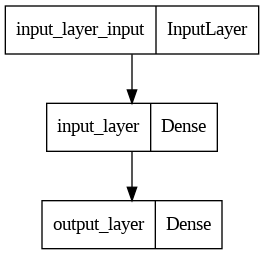

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(model)

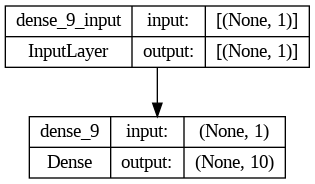

In [45]:
# plot_model(model, show_shapes=True) commenting it out, coz added output_layer to model

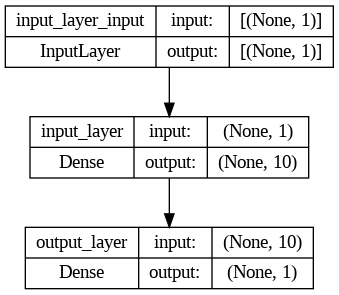

In [51]:
### after adding output_layer and adding names to all

plot_model(model, show_shapes=True)

## Visualizing our model's prediction

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [52]:
X_test

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

In [55]:
# Make predictions
y_preds = model.predict(X_test)

# View the predictions
y_preds

1/1 [==============================] - 0s 23ms/step


array([[ 70.42521 ],
       [ 75.00569 ],
       [ 79.58619 ],
       [ 84.166664],
       [ 88.747154],
       [ 93.327644],
       [ 97.90813 ],
       [102.48862 ],
       [107.0691  ],
       [111.64959 ]], dtype=float32)

In [56]:
# Note: If you think you're going to be visualizing something a lot,
# it's a good idea to functionize it so you can use it later.

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

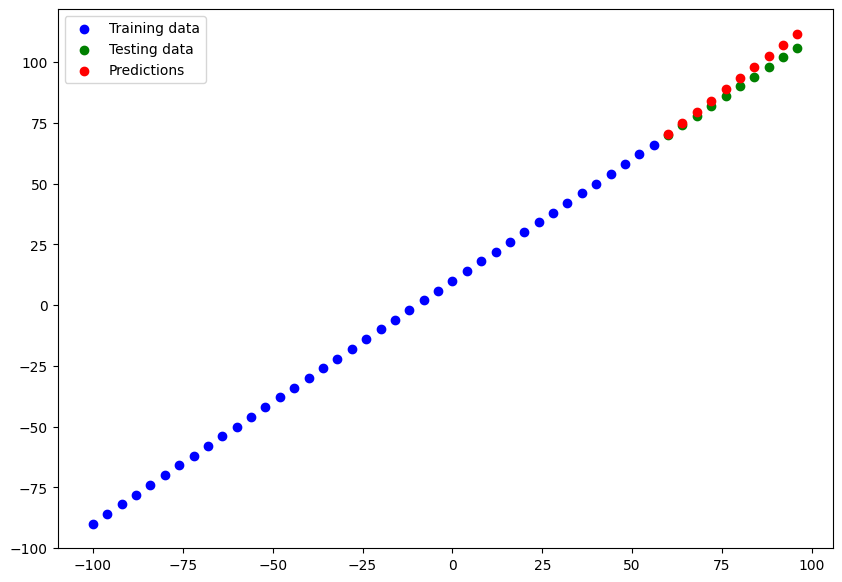

In [57]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

# Evaluating prediction

Two of the main metrics used for regression problems are:




> Mean absolute error (MAE) - the mean difference between each of the predictions.



> Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).


The lower each of these values, the better.

.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [58]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 260ms/step - loss: 3.0374 - mae: 3.0374


[3.037400722503662, 3.037400722503662]

In [60]:
y_test,    y_preds

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([[ 70.42521 ],
        [ 75.00569 ],
        [ 79.58619 ],
        [ 84.166664],
        [ 88.747154],
        [ 93.327644],
        [ 97.90813 ],
        [102.48862 ],
        [107.0691  ],
        [111.64959 ]], dtype=float32))

In [61]:
### calculate mean absolute error 

mae = tf.metrics.mean_absolute_error(y_test,y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.659832, 14.196585, 11.765524, 10.366667, 10.      , 10.665529,
       12.363251, 15.190893, 19.0691  , 23.64959 ], dtype=float32)>



---

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

---

.

This is because our y_test and y_preds tensors are different shapes.

In [62]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [65]:
y_preds = y_preds.squeeze()
y_preds.shape

(10,)

In [66]:
mae = tf.metrics.mean_absolute_error(y_test,y_preds)
mae

## thus now we are getting a single value for MAE Mean Absolute Error

<tf.Tensor: shape=(), dtype=float32, numpy=3.0373986>

In [67]:
## calculating MSE Mean Square Error

mse = tf.metrics.mean_squared_error(y_test,
                                    y_preds)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.005749>

MSE is greater than MAE, 

mae: It is the difference between the measured value and “true” value 

mse: It assesses the average squared difference between the observed and predicted



In [68]:
### Let's make functions for our evaluation metrics.

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
     

## Running experiments to evaluate a model

To do so, we'll build 3 models and compare their results:

.

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.

In [74]:
# model_1

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 81.8595 - mae: 81.8595
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 46.4624 - mae: 46.4624
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 12.8454 - mae: 12.8454
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.3663 - mae: 8.3663
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 11.8442 - mae: 11.8442
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.9661 - mae: 10.9661
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 8.5011 - mae: 8.5011
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 8.8994 - mae: 8.8994
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 17.1779 - mae: 17.1779
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 12.4679 - mae: 12.4679
Epoch 11/100
2/2 [==============================] - 0s 9

1/1 [==============================] - 0s 99ms/step


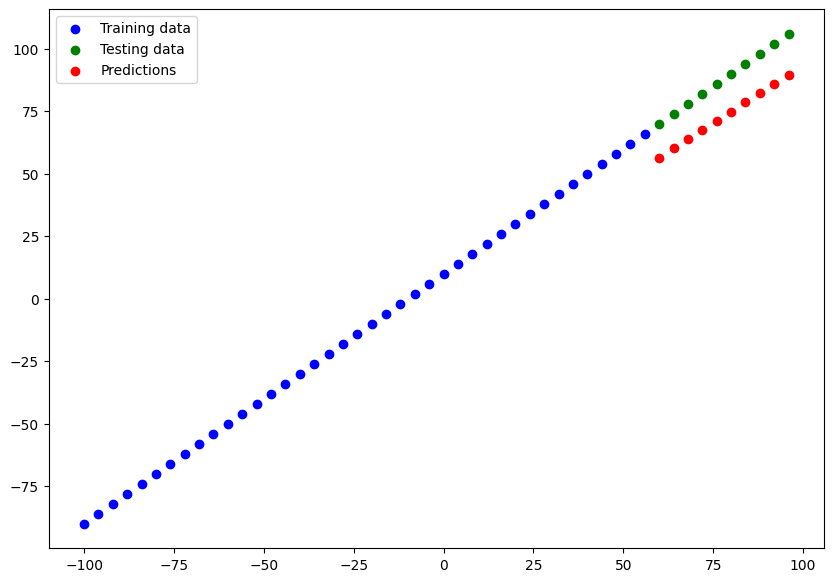

In [75]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [89]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1
     

(14.945013, 224.18965)

Thus 14 is the avg difference between predicted and actual test case

---



In [80]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 57ms/step


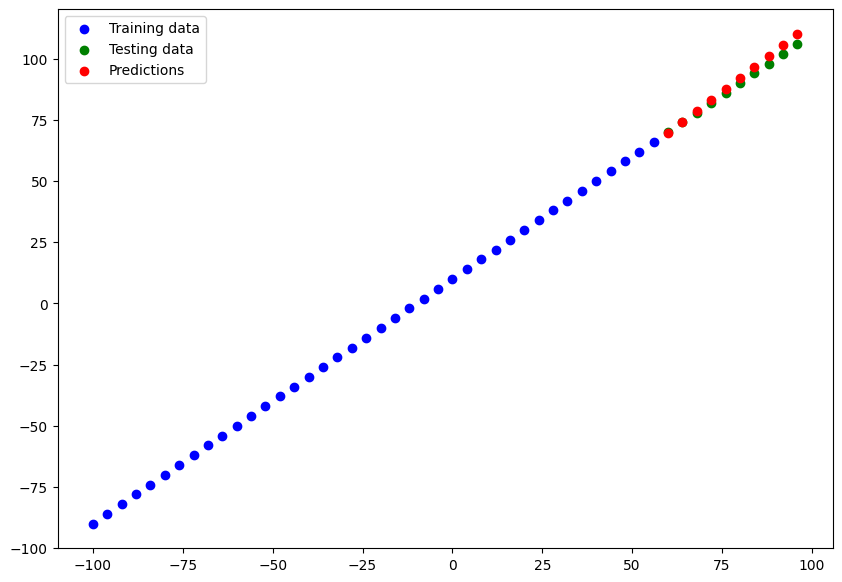

In [81]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [82]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.929602, 5.5693545)



---



---



In [83]:
# model_3

tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 23ms/step - loss: 110.5692 - mae: 110.5692
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 38.1283 - mae: 38.1283
Epoch 3/500
2/2 [==============================] - 0s 20ms/step - loss: 10.5689 - mae: 10.5689
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 12.1712 - mae: 12.1712
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 13.1837 - mae: 13.1837
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 10.6215 - mae: 10.6215
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 11.5406 - mae: 11.5406
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 10.6854 - mae: 10.6854
Epoch 9/500
2/2 [==============================] - 0s 16ms/step - loss: 35.4473 - mae: 35.4473
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 23.2738 - mae: 23.2738
Epoch 11/500
2/2 [=============================

1/1 [==============================] - 0s 232ms/step


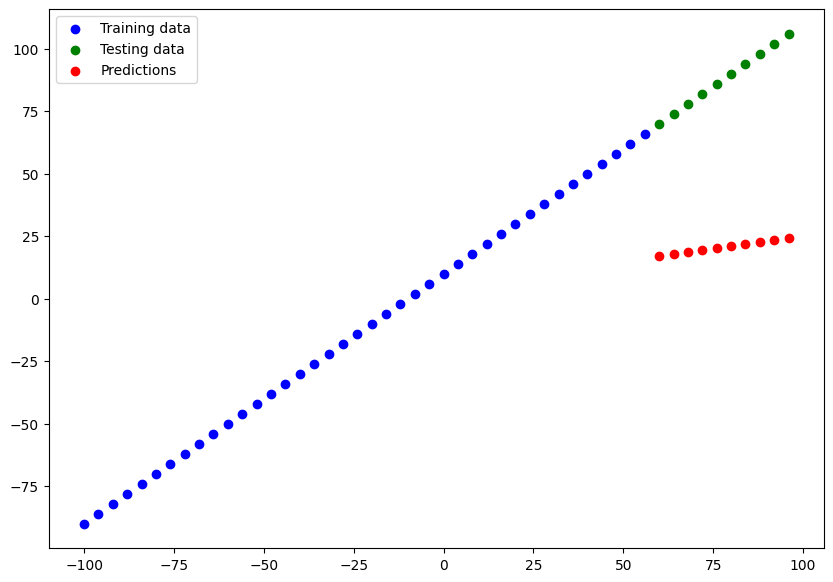

In [84]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [85]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.291466, 4610.95)

# comparing results

In [90]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [92]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.945013,224.189651
1,model_2,1.929602,5.569355
2,model_3,67.291466,67.291466


# Saving our model

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The SavedModel format (default).

The HDF5 format.


---


The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

In [93]:
# Save a model using the SavedModel format
model_2.save('model2_saved')

In [94]:
model_2.save('model2_saved_using_HDF5.h5') # h5 is the file extension here 

The basic difference between both is that, SaveModel format creates a folder, which has our saved model with .pb extension,
 
whereas, HTF5 saves our model directly as a file whith h5 extension

# Loading a model

both the models can be loaded using same method

In [95]:
loaded_saved_model = tf.keras.models.load_model("/content/model2_saved")
loaded_saved_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               200       
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 106ms/step


True

## Working on a larger dataset


In [97]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
## importing data through kaggle
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
     


In [99]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [100]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [104]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [105]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [106]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [110]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [111]:
X_train.head()

## as you can see the index, the dataset inside the X_train is randomly shuffeled

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [115]:
## creating a model for the above insurance problem

# create
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#fit
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8562.3008 - mae: 8562.3008
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.4609 - mae: 7884.4609
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7607.3989 - mae: 7607.3989
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7769.6108 - mae: 7769.6108
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7670.9419 - mae: 7670.9419
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7598.3379 - mae: 7598.3379
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7645.3975 - mae: 7645.3975
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7751.4741 - mae: 7751.4741
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7484.5908 - mae: 7484.5908
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7744.3589 - mae: 7744.3589

In [116]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7460.1587 - mae: 7460.1587


[7460.15869140625, 7460.15869140625]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

Increasing the number of layers (2 -> 3).

Increasing the number of units in each layer (except for the output layer).

Changing the optimizer (from SGD to Adam).



---
from next time try to change and compare the model results one by one instead of putting al the changes at once


In [120]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [121]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4713.2969 - mae: 4713.2969


[4713.296875, 4713.296875]

In [119]:
# one more model changing epochs

# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [123]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3504.7832 - mae: 3504.7832


[3504.783203125, 3504.783203125]

Text(0.5, 0, 'epochs')

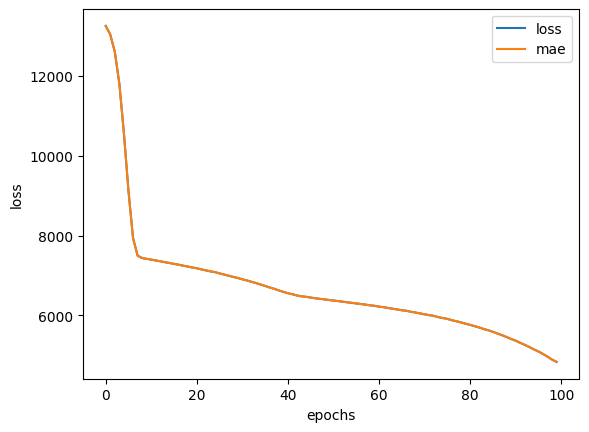

In [124]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data 

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

Turning all of your data to numbers (a neural network can't handle strings).

Making sure your data is in the right shape (verifying input and output shapes).

---

Normalizing data (making sure all values are between 0 and 1)

. This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.

.

Standardization (making sure all values have a mean of 0 and a variance of 1).

. This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:

MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).

OneHotEncoder - one hot encode the non-numerical columns.

<Axes: ylabel='Frequency'>

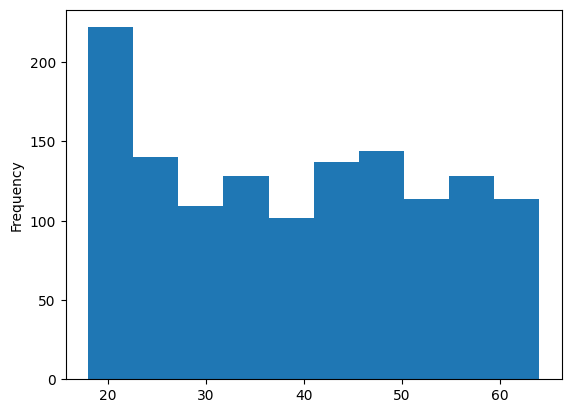

In [126]:
X["age"].plot(kind="hist") # age graph before using the normalization

In [127]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer that we have created on the training data only 
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [132]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [130]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [134]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_5.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [135]:
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 5ms/step - loss: 3166.8303 - mae: 3166.8303


[3166.830322265625, 3166.830322265625]

In [ ]:
# insurance_model_2 evaluation result

# 9/9 [==============================] - 0s 3ms/step - loss: 3504.7832 - mae: 3504.7832
# [3504.783203125, 3504.783203125]

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is one of the main benefits of normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).

insurance_model_2 may have eventually achieved the same results as insurance_model_3 if we left it training for longer.